In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random

# I. decaying E-greedy

```
for i in range(num_episodes):
    e = 1. / ((i / 100)+1)
    
    while not done:
        
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
```

# II. add random noise

```
action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))
```

# III. Discount Rewards

```
gamma = 0.99

# when update Q
Q[state, action] = reward + gamma * np.max(Q[new_state, :])
```

# SetUp

In [3]:
from gym.envs.registration import register

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={
        'map_name':'4x4',
        'is_slippery': False
    }
)

In [4]:
env = gym.make('FrozenLake-v3')
Q = np.zeros([env.observation_space.n, env.action_space.n])

dis = 0.99
num_episodes = 2000
rList = []

# Adding Random Noise

In [5]:
for i in range(num_episodes):
    
    state = env.reset()
    rAll = 0
    done = False
    
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))
        
        new_state, reward, done, _ = env.step(action)
        
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

Sucess rate: 0.991
[[0.         0.         0.95099005 0.        ]
 [0.         0.         0.96059601 0.        ]
 [0.         0.970299   0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.9801     0.        ]
 [0.         0.99       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


<BarContainer object of 2000 artists>

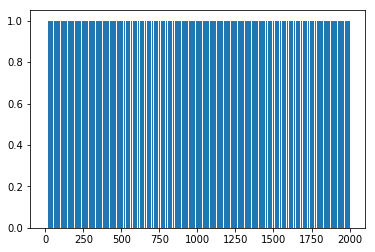

In [6]:
print(f"Sucess rate: {sum(rList)/num_episodes}")
print(Q)
plt.bar(list(range(1, num_episodes+1)), rList)

# E-greedy

In [1]:
rList = []
Q = np.zeros([env.observation_space.n, env.action_space.n])
for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    e = 1. / (1 + i // 100)
    
    while not done:
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
            
        
        new_state, reward, done, _ = env.step(action)
        
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        
        state = new_state
        rAll += reward
    
    rList.append(rAll)

NameError: name 'np' is not defined

Success rate: 0.806
[[0.94148015 0.95099005 0.95099005 0.94148015]
 [0.94148015 0.         0.96059601 0.95099005]
 [0.95099005 0.970299   0.95099005 0.96059601]
 [0.96059601 0.         0.95099005 0.95099005]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.96059601]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


<BarContainer object of 2000 artists>

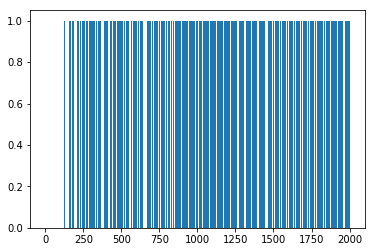

In [11]:
print(f"Success rate: {sum(rList)/num_episodes}")
print(Q)
plt.bar(list(range(1, num_episodes+1)), rList)